Sebastian Ruiz Uvalle

6BV1

Ing. en Inteligencia Artificial

19 de abril de 2023

Este programa se encarga de la agrupación de muestras de 5 libros diferentes obtenidos de Project Gutenberg (www.gutenberg.org), siendo el dataset de 2166 observaciones.

In [1]:
# Descarga de los titulos disponibles para descargar del Proyecto Gutenberg
import numpy as np
import nltk

nltk.download('gutenberg')
books_names=nltk.corpus.gutenberg.fileids()
books_names

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [2]:
# Selección de los libros que vamos a usar para la practica

books_idx=[1,3,5,7,9]
selected_books=[]
for idx in books_idx:
  selected_books.append(books_names[idx])
print(selected_books)

['austen-persuasion.txt', 'bible-kjv.txt', 'bryant-stories.txt', 'carroll-alice.txt', 'chesterton-brown.txt']


In [3]:
# Obtención del corpus de los libros seleccionados y su visualización

book_contents=[]
for book_name in selected_books:
    book_contents.append(nltk.corpus.gutenberg.raw(book_name))
book_contents[0][1:500]

'Persuasion by Jane Austen 1818]\n\n\nChapter 1\n\n\nSir Walter Elliot, of Kellynch Hall, in Somersetshire, was a man who,\nfor his own amusement, never took up any book but the Baronetage;\nthere he found occupation for an idle hour, and consolation in a\ndistressed one; there his faculties were roused into admiration and\nrespect, by contemplating the limited remnant of the earliest patents;\nthere any unwelcome sensations, arising from domestic affairs\nchanged naturally into pity and contempt as he turn'

In [4]:
# Descarga de las bibliotecas necesarias para poder remover palabras irrelevantes, sustituir palabras
# flexionadas por un termino general y sustituir terminos por su raiz gramatical
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [5]:
import re

def get_wordnet_pos(word):
    # Mapeamos la etiqueta POS al primer caracter lemmatize() acepte
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)


def clean_text(text):
    # Definicion de patron de palabras para la mantencion de estas y pasado de texto a minusculas
    lemmatizer = WordNetLemmatizer()
    sub_pattern = r'[^A-Za-z]'
    split_pattern = r"\s+"
    stop_words = stopwords.words('english') + ['chapter','never','ever','couldnot','wouldnot','could','would','us',"i'm","you'd"]
    lower_book = text.lower()

    # Reemplazando todos los caracteres, excepto los que esten en los patrones definidos en sub_patten
    # a espacios, tokenizado de los documentos y lematizacion 
    filtered_book = re.sub(sub_pattern,' ',lower_book).lstrip().rstrip()
    filtered_book = word_tokenize(filtered_book)
    filtered_book = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in filtered_book if word not in stop_words]

    return filtered_book

In [6]:
# Obtencion del corpus de los 5 libros ya limpiados en cleaned_boos_contents
cleaned_books_contents=[]
for book in book_contents :
    cleaned_books_contents.append(clean_text(book))
cleaned_books_contents[0][1:30]

['jane',
 'austen',
 'sir',
 'walter',
 'elliot',
 'kellynch',
 'hall',
 'somersetshire',
 'man',
 'amusement',
 'take',
 'book',
 'baronetage',
 'found',
 'occupation',
 'idle',
 'hour',
 'consolation',
 'distressed',
 'one',
 'faculty',
 'rouse',
 'admiration',
 'respect',
 'contemplate',
 'limited',
 'remnant',
 'early',
 'patent']

In [7]:
# Vista de cuantas palabras tiene cada documento
for i in range(len(cleaned_books_contents)):
    size = len(cleaned_books_contents[i])
    print(size)

37186
372131
21357
11984
34882


In [8]:
# Creacion de 500 muestras aproximadamente aleatorias de cada libro donde cada muestra contiene 50 palabras
def book_samples(book,n_samples) :
    import random
    samples=[]
    start=0
    while start +n_samples < len(book)-1:
        temp1=""
        for j in range(start,start+n_samples):
            temp1+= book[j] + " "
        samples.append(temp1)
        start+=n_samples
    random_samples_index=random.sample(range(0,len(samples)), k=min(500,len(samples)))
    partitions=[]
    for idx in random_samples_index :
        partitions.append(samples[idx])
    return partitions

In [9]:
samples_of_books=[]
for cleaned_book in cleaned_books_contents :
    samples_of_books.append(book_samples(cleaned_book,50))
samples_of_books[0][0]

'satisfied appointment desire great object time sea great object want something sure young fellow like ashore half year together man wife soon want afloat captain wentworth cry louisa vexed must come asp see old thing give knew pretty well day say smile discovery make fashion strength old pelisse see lent '

In [10]:
import pandas as pd
data_frame = pd.DataFrame()
data_frame[0] = [item for sublist in samples_of_books for item in sublist]
target = [[selected_books[i]]*min(500,len(samples_of_books[i])) for i in range(len(selected_books)) ]
data_frame[1] = [item for sublist in target for item in sublist]
data_frame[1].unique()

array(['austen-persuasion.txt', 'bible-kjv.txt', 'bryant-stories.txt',
       'carroll-alice.txt', 'chesterton-brown.txt'], dtype=object)

In [11]:
from sklearn.utils import shuffle

data = shuffle(data_frame[0])
data

1833    green peacock blue satin gleam like blue green...
1177    met mine something pierce heart pity shame lea...
938     reign israel solomon gather chariot horseman t...
2089    sigh consider man feel lonely less sure alone ...
2024    tower may easily suppose plenty superstition s...
                              ...                        
740     men faint follow david make also abide brook b...
390     happy rejoice every circumstance favour diffic...
1410    broke strong grind fell two whole world shook ...
1797    culture restless publicity great amateur arden...
1484    mouse air afraid might catch bat like mouse kn...
Name: 0, Length: 2166, dtype: object

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer1Gram = TfidfVectorizer(ngram_range=(1,1))
vectorizer2Gram = TfidfVectorizer(ngram_range=(1,2))

X1g = vectorizer1Gram.fit_transform(data)
X2g = vectorizer2Gram.fit_transform(data)
print(X1g)
print(X2g)

  (0, 9388)	0.07680748187126284
  (0, 8544)	0.18163761546712914
  (0, 5778)	0.16587617825940168
  (0, 3605)	0.06525982390087154
  (0, 6527)	0.18163761546712914
  (0, 481)	0.16587617825940168
  (0, 2527)	0.12816981741932182
  (0, 5704)	0.09482685609257945
  (0, 5355)	0.18163761546712914
  (0, 4509)	0.1608021288064312
  (0, 3088)	0.15665632853540992
  (0, 6313)	0.17241776574313739
  (0, 6033)	0.12816981741932182
  (0, 6509)	0.13167504160369073
  (0, 1113)	0.2900813831974074
  (0, 4580)	0.17241776574313739
  (0, 98)	0.1450406915987037
  (0, 289)	0.13738966714331355
  (0, 3737)	0.06472159883757174
  (0, 1580)	0.17241776574313739
  (0, 5168)	0.1450406915987037
  (0, 1636)	0.11591360439596324
  (0, 3751)	0.11187332147111477
  (0, 3778)	0.09558912682009543
  (0, 1009)	0.10468014363686548
  :	:
  (2165, 9373)	0.08442014896705274
  (2165, 2686)	0.0892662453578161
  (2165, 170)	0.09161878288535842
  (2165, 233)	0.06330213940918673
  (2165, 7840)	0.07737749742977773
  (2165, 5526)	0.1840823549873

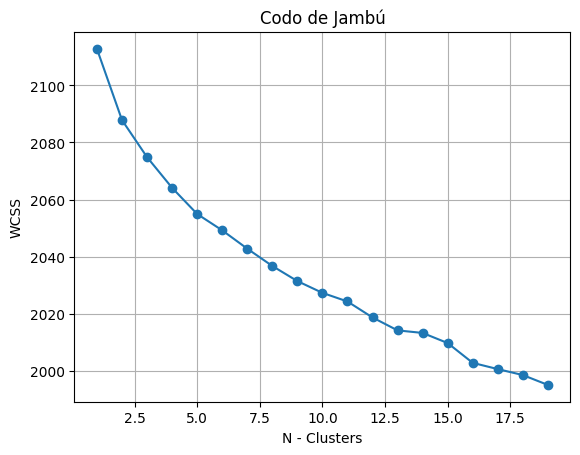

In [13]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for j in range(1,20):
    # print('Realizando kMeans con ' + str(j) + " kluster's")
    kmeans = KMeans(n_clusters=j, max_iter=300)
    kmeans.fit(X1g)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,20), wcss,'o-')
plt.title("Codo de Jambú")
plt.xlabel('N - Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

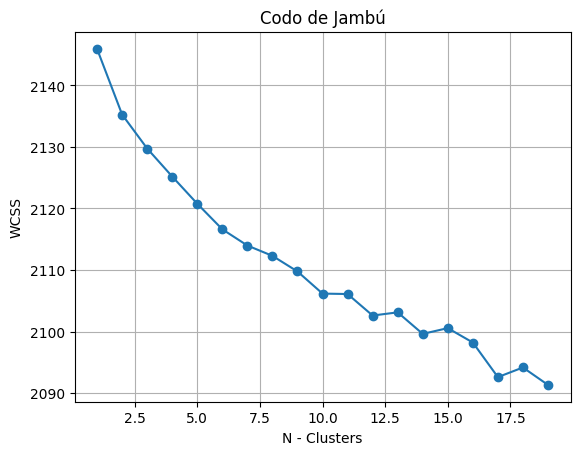

In [14]:
wcss = []
for j in range(1,20):
    # print('Realizando kMeans con ' + str(j) + " kluster's")
    kmeans = KMeans(n_clusters=j, max_iter=300)
    kmeans.fit(X2g)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,20), wcss,'o-')
plt.title("Codo de Jambú")
plt.xlabel('N - Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

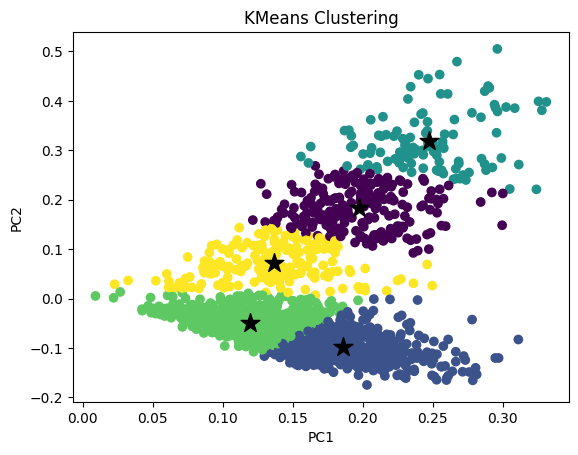

In [16]:
from sklearn.decomposition import TruncatedSVD

kmeans = KMeans(n_clusters=5, max_iter=300)
kmeans.fit(X1g)
pred = kmeans.fit_predict(X1g)

svd = TruncatedSVD(n_components=2, random_state=24)
dataSVD = svd.fit_transform(X1g)
fitted = kmeans.fit_predict(dataSVD)
fitted_pd = pd.DataFrame(fitted)

clusters = kmeans.labels_
centers = kmeans.cluster_centers_

plt.scatter(dataSVD[:,0], dataSVD[:,1], c=clusters)
plt.scatter(centers[:,0], centers[:,1], marker='*', s=200, c='black')
plt.title('KMeans Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

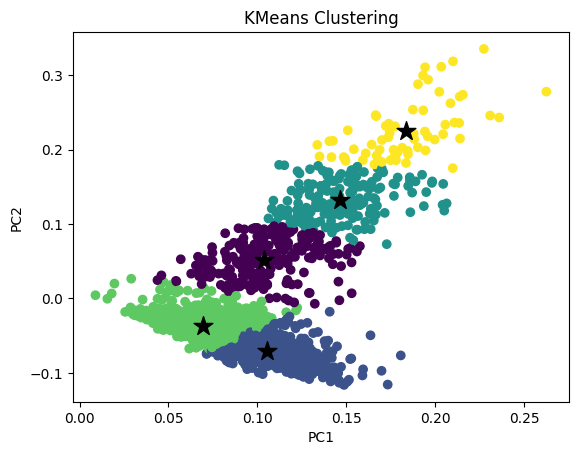

In [17]:
kmeans = KMeans(n_clusters=5, max_iter=300)
kmeans.fit(X2g)
pred = kmeans.fit_predict(X2g)

svd = TruncatedSVD(n_components=2, random_state=24)
dataSVD = svd.fit_transform(X2g)
fitted = kmeans.fit_predict(dataSVD)
fitted_pd = pd.DataFrame(fitted)

clusters = kmeans.labels_
centers = kmeans.cluster_centers_

plt.scatter(dataSVD[:,0], dataSVD[:,1], c=clusters)
plt.scatter(centers[:,0], centers[:,1], marker='*', s=200, c='black')
plt.title('KMeans Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [18]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)
train_data = tokenizer.texts_to_sequences(data)
train_data = tokenizer.sequences_to_matrix(train_data, mode='binary')

train_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])